In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time

In [2]:
Xtrain = np.load('../data/neural_network_kannada/X_train.npy')
ytrain = np.load('../data/neural_network_kannada/y_train.npy')
Xtest = np.load('../data/neural_network_kannada/X_test.npy')
ytest = np.load('../data/neural_network_kannada/y_test.npy')

In [3]:
Xtrain.shape

(60000, 28, 28)

In [4]:
Xtrain = Xtrain.reshape((Xtrain.shape[0],-1))
Xtest = Xtest.reshape((Xtest.shape[0],-1))

In [181]:
Xtrain = Xtrain / 255
Xtest = Xtest/255

In [66]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_grad(z):
    e = sigmoid(z)
    return e * (1 - e)

def relu(z):
    return np.max(z,0)

def binarize(y,num_classes):
    temp = np.zeros((y.shape[0],num_classes))
    for j in range(len(y)):
        for i in range(num_classes):
            if i == y[j]:
                temp[j][i] = 1
                break
    return temp

class Layer:
    def __init__(self,in_size,out):
        
        self.input = None
        self.output = None
        self.wt = np.random.normal(0,1,(out,in_size))
        self.grads = None
        self.inputs = None
        self.outputs = None
        self.grad = None
        
class NeuralNetwork:
    
    def __init__(self, M, n, r, layers = None, activation = 'sigmoid', verbose = False):
        self.target = r
        self.layers = []
        self.mini_batch_size = M
        self.lr = 0.001
        self.verbose = verbose
        self.features = n+1
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.gradient = sigmoid_grad
        elif activation == 'ReLU':
            self.activation = relu
        
        down = n+1
        up = layers[0]
        
        self.layers.append(Layer(down,up))
        
        for i in range(len(layers)-1):
            down = layers[i]
            up = layers[i+1]
            self.layers.append(Layer(down,up))
            
        self.layers.append(Layer(layers[-1],r))
        
    def forward(self,Xt):
        
        X = np.ones((Xt.shape[0],Xt.shape[1]+1))
        X[:,1:] = X[:,1:] * Xt
        
        self.layers[0].input = X
        
        for i in range(1,len(self.layers)):
            
            prev_layer = self.layers[i-1]
            curr_layer = self.layers[i]
            z = np.matmul(prev_layer.input,prev_layer.wt.T)
            
            if i == len(self.layers):
                act = sigmoid(z)
            else:
                act = self.activation(z)
            curr_layer.input = act
        
        last_layer = self.layers[-1]
        last_layer.output = self.activation(np.matmul(last_layer.input,last_layer.wt.T))

    def backward(self,ylabel):

        ypred = self.layers[-1].output
        error = np.mean(0.5*np.sum((ypred-ylabel)**2,axis = 1))
        
        del_netj = -(ylabel-ypred)*self.gradient(ypred)
        
        for i in range(len(self.layers)-1,-1,-1):
            
            curr_layer = self.layers[i]
            curr_layer.grad = np.matmul(del_netj.T,curr_layer.input)
            del_netj = np.matmul(del_netj, curr_layer.wt) * self.gradient(curr_layer.input)            
            
        for layer in self.layers:
            layer.wt = layer.wt - self.lr * layer.grad
        
        return error
    
    def train(self,X,y):
        acc_train = []
        acc_test = []
        b = self.mini_batch_size
        m = X.shape[0]
        batchesX = []
        batchesy = []
        
        for i in range(m//b):
            batchesX.append(X[b*i:b*i+b])
            batchesy.append(y[b*i:b*i+b])
            
        converged = False
        temp = []
        epochs = 0
        while not converged:
            errs = []
            for batch in range(m//b):
                Xbatch,ybatch = batchesX[batch],batchesy[batch]
                self.forward(Xbatch)
                err = self.backward(ybatch)
                errs.append(err)
            
            temp.append(np.mean(errs))
            if len(temp) > 10:
                if np.max(temp[-10:]) - np.min(temp[-10:]) < 5e-5:
                    converged = True
                    return acc_train,acc_test
            
            if self.verbose:
                print("Epochs:",epochs,"Loss:",np.mean(errs))
            epochs += 1
            acc_train.append(self.score(Xtrain,ytrain))
            acc_test.append(self.score(Xtest,ytest))
        
    def predict(self,X):
        self.forward(X)
        return np.argmax(self.layers[-1].output,axis = 1)

    def score(self,X,y):
        return np.mean(y == self.predict(X))

In [67]:
#scores_train = []
#scores_test = []
metric_layer = []
#times = []
layers = [1, 10, 50, 100, 500]
accs_train = []
accs_test = []
ybin = binarize(ytrain,10)

In [69]:
nn = NeuralNetwork(100, Xtrain.shape[1],10,layers = [1],verbose = False)
start = time.time()
acc_train,acc_test = nn.train(Xtrain,ybin)
accs_train.append(acc_train)
accs_test.append(acc_test)
end = time.time()
print("Time:",end-start)

#metric_layer.append(err)
#sc_train = nn.score(Xtrain,ytrain)
#sc_test = nn.score(Xtest,ytest)
#print("SC-Train:",sc_train)
#print("SC-Test:",sc_test)
#scores_train.append(sc_train)
#scores_test.append(sc_test)
#times.append(end-start)

/home/parm_khakhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Time: 11.029855251312256
Time: 550.9811472892761
Time: 566.2606546878815
Time: 1808.504723072052
Time: 7200.426886320114


In [55]:
metric_layer

[0.4500000000000002,
 0.10543292613876856,
 0.05883487151721075,
 0.04488715922131976,
 0.03187431489083922]

In [40]:
scores_train

[0.1, 0.87535, 0.9436, 0.9470666666666666, 0.9672166666666666]

In [41]:
scores_test

[0.1, 0.7541, 0.8607, 0.8702, 0.8919]

In [42]:
times

[6.17658543586731,
 378.01185941696167,
 1039.1614747047424,
 1683.3169915676117,
 3020.146491289139]

In [56]:
metric_layer

[0.4500000000000002,
 0.10543292613876856,
 0.05883487151721075,
 0.04488715922131976,
 0.03187431489083922]

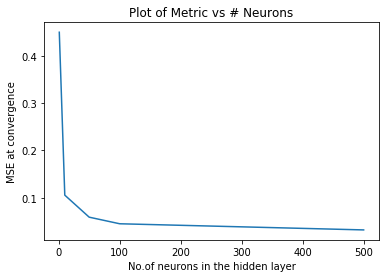

In [57]:
fig,ax = plt.subplots()
ax.plot(layers,metric_layer)
ax.set_xlabel("No.of neurons in the hidden layer")
ax.set_ylabel("MSE at convergence")
ax.set_title("Plot of Metric vs # Neurons")
fig.savefig("../output/q2/metric.png",dpi = 200)

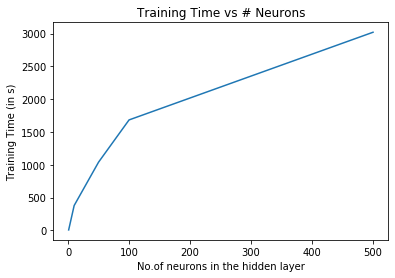

In [59]:
fig,ax = plt.subplots()
ax.plot(layers,times)
ax.set_xlabel("No.of neurons in the hidden layer")
ax.set_ylabel("Training Time (in s)")
ax.set_title("Training Time vs # Neurons")
fig.savefig("../output/q2/time.png",dpi = 200)

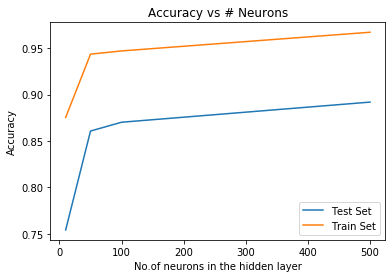

In [62]:
fig,ax = plt.subplots()
ax.plot(layers[1:],scores_test[1:],label = "Test Set")
ax.plot(layers[1:],scores_train[1:],label = "Train Set")
ax.set_xlabel("No.of neurons in the hidden layer")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs # Neurons")
ax.legend(loc = 'best')
fig.savefig("../output/q2/acc_final.png",dpi = 200)

In [31]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier((10),activation='logistic',solver='sgd',batch_size=100,verbose = True)
mlp.fit(Xtrain,ytrain)

Iteration 1, loss = 1.68271491
Iteration 2, loss = 1.15361130
Iteration 3, loss = 0.85965572
Iteration 4, loss = 0.68832902
Iteration 5, loss = 0.58296670
Iteration 6, loss = 0.51027388
Iteration 7, loss = 0.45913388
Iteration 8, loss = 0.42402594
Iteration 9, loss = 0.39143896
Iteration 10, loss = 0.36776075
Iteration 11, loss = 0.35161911
Iteration 12, loss = 0.33298301
Iteration 13, loss = 0.32068562
Iteration 14, loss = 0.30641932
Iteration 15, loss = 0.29890834
Iteration 16, loss = 0.28904794
Iteration 17, loss = 0.28665165
Iteration 18, loss = 0.27626718
Iteration 19, loss = 0.27278429
Iteration 20, loss = 0.26540453
Iteration 21, loss = 0.26472940
Iteration 22, loss = 0.26193207
Iteration 23, loss = 0.25323548
Iteration 24, loss = 0.24738196
Iteration 25, loss = 0.24744077
Iteration 26, loss = 0.24557222
Iteration 27, loss = 0.23721685
Iteration 28, loss = 0.23965576
Iteration 29, loss = 0.23311490
Iteration 30, loss = 0.23458031
Iteration 31, loss = 0.23321322
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [153]:
mlp.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [32]:
mlp.score(Xtest,ytest)

0.861

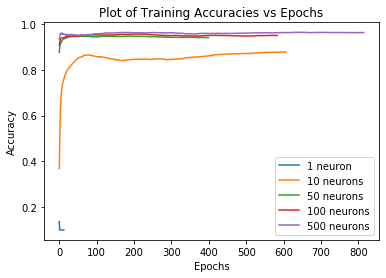

In [83]:
fig,ax = plt.subplots()
ax.plot([i for i in range(len(accs_train[0]))],accs_train[0],label = '1 neuron')
ax.plot([i for i in range(len(accs_train[1]))],accs_train[1],label = '10 neurons')
ax.plot([i for i in range(len(accs_train[2]))],accs_train[2],label = '50 neurons')
ax.plot([i for i in range(len(accs_train[3]))],accs_train[3],label = '100 neurons')
ax.plot([i for i in range(len(accs_train[4]))],accs_train[4],label = '500 neurons')
ax.legend(loc = 'best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epochs")
ax.set_title("Plot of Training Accuracies vs Epochs")
fig.savefig('../output/q2/train.png',dpi = 200)

In [100]:
train_accs = []
test_accs = []

In [102]:
nn = NeuralNetwork(100, Xtrain.shape[1],10,layers = [100],verbose = False)
start = time.time()
acc_train,acc_test = nn.train(Xtrain,ybin)
train_accs.append(acc_train)
test_accs.append(acc_test)
end = time.time()
print("Time:",end-start)

Time: 2515.102016210556


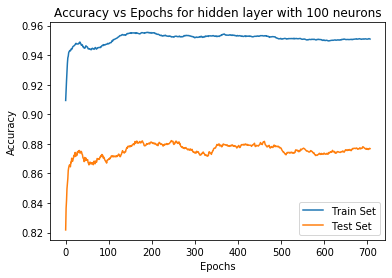

In [103]:
fig,ax = plt.subplots()
ax.plot([i for i in range(len(train_accs[0]))],train_accs[0],label = 'Train Set')
ax.plot([i for i in range(len(test_accs[0]))],test_accs[0],label = 'Test Set')
ax.set_xlabel('Epochs')
ax.set_ylabel("Accuracy")
ax.legend(loc = 'best')
ax.set_title("Accuracy vs Epochs for hidden layer with 100 neurons")
fig.savefig('../output/q2/acc_100.png',dpi = 200)

### Adaptive Learning Rate

In [43]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_grad(z):
    e = sigmoid(z)
    return e * (1 - e)

def relu(z):
    return np.max(z,0)

def binarize(y,num_classes):
    temp = np.zeros((y.shape[0],num_classes))
    for j in range(len(y)):
        for i in range(num_classes):
            if i == y[j]:
                temp[j][i] = 1
                break
    return temp

class Layer:
    def __init__(self,in_size,out):
        
        self.input = None
        self.output = None
        self.wt = np.random.normal(0,1,(out,in_size))
        self.grads = None
        self.inputs = None
        self.outputs = None
        self.grad = None
        
class NeuralNetwork:
    
    def __init__(self, M, n, r, layers = None, activation = 'sigmoid', verbose = False, adaptive = False):
        self.target = r
        self.layers = []
        self.mini_batch_size = M
        if adaptive:
            self.lr = 0.5
        else:
            self.lr = 0.001
        self.verbose = verbose
        self.features = n+1
        self.adaptive = adaptive
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.gradient = sigmoid_grad
        elif activation == 'ReLU':
            self.activation = relu
        
        down = n+1
        up = layers[0]
        
        self.layers.append(Layer(down,up))
        
        for i in range(len(layers)-1):
            down = layers[i]
            up = layers[i+1]
            self.layers.append(Layer(down,up))
            
        self.layers.append(Layer(layers[-1],r))
        
    def forward(self,Xt):
        
        X = np.ones((Xt.shape[0],Xt.shape[1]+1))
        X[:,1:] = X[:,1:] * Xt
        
        self.layers[0].input = X
        
        for i in range(1,len(self.layers)):
            
            prev_layer = self.layers[i-1]
            curr_layer = self.layers[i]
            z = np.matmul(prev_layer.input,prev_layer.wt.T)
            
            if i == len(self.layers):
                act = sigmoid(z)
            else:
                act = self.activation(z)
            curr_layer.input = act
        
        last_layer = self.layers[-1]
        last_layer.output = self.activation(np.matmul(last_layer.input,last_layer.wt.T))

    def backward(self,ylabel):

        ypred = self.layers[-1].output
        error = np.mean(0.5*np.sum((ypred-ylabel)**2,axis = 1))
        
        del_netj = -(ylabel-ypred)*self.gradient(ypred)
        
        for i in range(len(self.layers)-1,-1,-1):
            
            curr_layer = self.layers[i]
            curr_layer.grad = np.matmul(del_netj.T,curr_layer.input)
            del_netj = np.matmul(del_netj, curr_layer.wt) * self.gradient(curr_layer.input)            
    
        return error
    
    def update(self,epoch):
        for layer in self.layers:
            if self.adaptive:
                layer.wt = layer.wt - (self.lr)/np.sqrt(epoch+1) * layer.grad
            else:
                layer.wt = layer.wt - self.lr * layer.grad
    
    def train(self,X,y):
        
        acc_train = []
        acc_test = []
        b = self.mini_batch_size
        m = X.shape[0]
        batchesX = []
        batchesy = []
        
        for i in range(m//b):
            batchesX.append(X[b*i:b*i+b])
            batchesy.append(y[b*i:b*i+b])
            
        converged = False
        temp = []
        epochs = 0
        while not converged:
            errs = []
            for batch in range(m//b):
                Xbatch,ybatch = batchesX[batch],batchesy[batch]
                self.forward(Xbatch)
                err = self.backward(ybatch)
                
                self.update(epochs)
                errs.append(err)
            
            temp.append(np.mean(errs))
            if len(temp) > 10:
                if np.max(temp[-10:]) - np.min(temp[-10:]) < 1e-4:
                    converged = True
                    return temp[-1]
            
            if self.verbose:
                print("Epochs:",epochs,"Loss:",np.mean(errs))
            epochs += 1
            #acc_train.append(self.score(Xtrain,ytrain))
            #acc_test.append(self.score(Xtest,ytest))
        
    def predict(self,X):
        self.forward(X)
        return np.argmax(self.layers[-1].output,axis = 1)

    def score(self,X,y):
        return np.mean(y == self.predict(X))

In [44]:
scores_train1 = []
scores_test1 = []
metric_layer1 = []
times1 = []
layers = [1, 10, 50, 100, 500]
accs_train1 = []
accs_test1 = []
ybin = binarize(ytrain,10)

In [61]:
nn = NeuralNetwork(100, Xtrain.shape[1],10,layers = [500],verbose = True,adaptive=True)
start = time.time()
err = nn.train(Xtrain,ybin)
end = time.time()
print("Time:",end-start)

metric_layer1.append(err)
sc_train = nn.score(Xtrain,ytrain)
sc_test = nn.score(Xtest,ytest)
print("SC-Train:",sc_train)
print("SC-Test:",sc_test)
scores_train1.append(sc_train)
scores_test1.append(sc_test)
times1.append(end-start)

/home/parm_khakhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epochs: 0 Loss: 0.09512078703754615
Epochs: 1 Loss: 0.04145684294999386
Epochs: 2 Loss: 0.03757188075098606
Epochs: 3 Loss: 0.035263046799275014
Epochs: 4 Loss: 0.03386327274333669
Epochs: 5 Loss: 0.03339689074899431
Epochs: 6 Loss: 0.032179731610897926
Epochs: 7 Loss: 0.03145895517335528
Epochs: 8 Loss: 0.031700967083662546
Epochs: 9 Loss: 0.03097153583947092
Epochs: 10 Loss: 0.03057941306791466
Epochs: 11 Loss: 0.029642115017410896
Epochs: 12 Loss: 0.02918430702778575
Epochs: 13 Loss: 0.03018869574614963
Epochs: 14 Loss: 0.02954241849760781
Epochs: 15 Loss: 0.02887358035393433
Epochs: 16 Loss: 0.028890166406403742
Epochs: 17 Loss: 0.028414605651887036
Epochs: 18 Loss: 0.02745065347423489
Epochs: 19 Loss: 0.027142252612870118
Epochs: 20 Loss: 0.027172221786967276
Epochs: 21 Loss: 0.026911509827388713
Epochs: 22 Loss: 0.026863964071258545
Epochs: 23 Loss: 0.02697153069860942
Epochs: 24 Loss: 0.025893621763568467
Epochs: 25 Loss: 0.025806655116292442
Epochs: 26 Loss: 0.02599695892135573

Epochs: 215 Loss: 0.017193979684548055
Epochs: 216 Loss: 0.017250679021539022
Epochs: 217 Loss: 0.017183725246706666
Epochs: 218 Loss: 0.01712104659692571
Epochs: 219 Loss: 0.017091896104890012
Epochs: 220 Loss: 0.017028219901465535
Epochs: 221 Loss: 0.017053627432699402
Epochs: 222 Loss: 0.017000203728648623
Epochs: 223 Loss: 0.016984280256398417
Epochs: 224 Loss: 0.01694368238064199
Epochs: 225 Loss: 0.016899742924163335
Epochs: 226 Loss: 0.0169568333154071
Epochs: 227 Loss: 0.017030669801452434
Epochs: 228 Loss: 0.01708160629835899
Epochs: 229 Loss: 0.017133025405387775
Epochs: 230 Loss: 0.017172836315767576
Epochs: 231 Loss: 0.017172716657885525
Epochs: 232 Loss: 0.01719995025439401
Epochs: 233 Loss: 0.01716601344537242
Epochs: 234 Loss: 0.017112889377433774
Epochs: 235 Loss: 0.01699259389919566
Epochs: 236 Loss: 0.01692285191263601
Epochs: 237 Loss: 0.016830839166018012
Epochs: 238 Loss: 0.016887215276161646
Epochs: 239 Loss: 0.01698403992493176
Epochs: 240 Loss: 0.016966655489173

In [62]:
scores_train1

[0.1, 0.88205, 0.9433, 0.9567833333333333, 0.9777]

In [63]:
scores_test1

[0.1, 0.7745, 0.8601, 0.8819, 0.904]

In [64]:
metric_layer1

[0.4500000000000002,
 0.09663252053407845,
 0.04695570388384016,
 0.032749861327697034,
 0.018199256684898798]

In [65]:
times1

[5.283642292022705,
 79.28607320785522,
 291.08711767196655,
 362.0485074520111,
 2010.773341178894]

In [22]:
scores_train = [0.1, 0.8797, 0.9315833333333333, 0.9532, 0.9665] 

In [23]:
scores_test = [0.1, 0.7848, 0.8512, 0.875, 0.898]

In [24]:
metric_layer = [0.4500000000000001,
 0.10215026486395688,
 0.05616933281856132,
 0.04062331911584101,
 0.031642428483938057]

In [25]:
times = [6.365220308303833,
 337.1908349990845,
 789.3887455463409,
 1420.0171437263489,
 3218.1510400772095]

In [138]:
metric_layer_na = [0.4500000000000002,
 0.10543292613876856,
 0.05883487151721075,
 0.04488715922131976,
 0.03187431489083922]

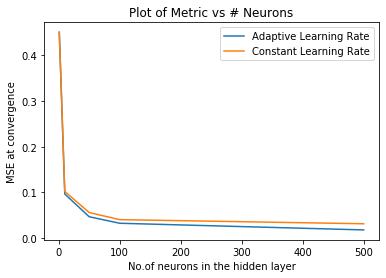

In [66]:
fig,ax = plt.subplots()
ax.plot(layers,metric_layer1,label = 'Adaptive Learning Rate')
ax.plot(layers,metric_layer,label = 'Constant Learning Rate')
ax.set_xlabel("No.of neurons in the hidden layer")
ax.set_ylabel("MSE at convergence")
ax.set_title("Plot of Metric vs # Neurons")
ax.legend(loc = 'best')
fig.savefig("../output/q2/ad_metric.png",dpi = 200)

In [132]:
times_na = [6.17658543586731,
 378.01185941696167,
 1039.1614747047424,
 1683.3169915676117,
 3020.146491289139]

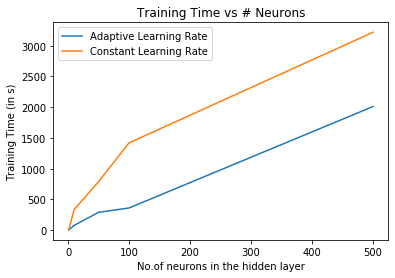

In [67]:
fig,ax = plt.subplots()
ax.plot(layers,times1,label = 'Adaptive Learning Rate')
ax.plot(layers,times,label = 'Constant Learning Rate')
ax.set_xlabel("No.of neurons in the hidden layer")
ax.set_ylabel("Training Time (in s)")
ax.set_title("Training Time vs # Neurons")
ax.legend(loc = 'best')
fig.savefig("../output/q2/ada_time.png",dpi = 200)

In [142]:
scores_test_na = [0.1, 0.7541, 0.8607, 0.8702, 0.8919]
scores_train_na = [0.1, 0.87535, 0.9436, 0.9470666666666666, 0.9672166666666666]

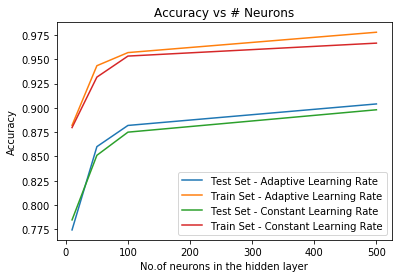

In [68]:
fig,ax = plt.subplots()
ax.plot(layers[1:],scores_test1[1:],label = "Test Set - Adaptive Learning Rate")
ax.plot(layers[1:],scores_train1[1:],label = "Train Set - Adaptive Learning Rate")
ax.plot(layers[1:],scores_test[1:],label = "Test Set - Constant Learning Rate")
ax.plot(layers[1:],scores_train[1:],label = "Train Set - Constant Learning Rate")
ax.set_xlabel("No.of neurons in the hidden layer")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs # Neurons")
ax.legend(loc = 'best')
fig.savefig("../output/q2/ad_acc_final.png",dpi = 200)

### ReLU Activation

In [80]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_grad(z):
    e = sigmoid(z)
    return e * (1 - e)

def relu(z):
    z[z <= 0] = 0
    return z

def relu_grad(z):
    return (z > 0) * 1

def binarize(y,num_classes):
    temp = np.zeros((y.shape[0],num_classes))
    for j in range(len(y)):
        for i in range(num_classes):
            if i == y[j]:
                temp[j][i] = 1
                break
    return temp

class Layer:
    def __init__(self,in_size,out):
        
        self.input = None
        self.output = None
        self.wt = np.random.normal(0,0.01,(out,in_size))
        self.grads = None
        self.inputs = None
        self.outputs = None
        self.grad = None
        
class NeuralNetwork:
    
    def __init__(self, M, n, r, layers = None, activation = 'sigmoid', verbose = False, adaptive = False):
        self.target = r
        self.layers = []
        self.mini_batch_size = M
        self.lr = 0.001
        self.verbose = verbose
        self.features = n+1
        self.adaptive = adaptive
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.gradient = sigmoid_grad
        elif activation == 'ReLU':
            self.activation = relu
            self.gradient = relu_grad
        
        down = n+1
        up = layers[0]
        
        self.layers.append(Layer(down,up))
        
        for i in range(len(layers)-1):
            down = layers[i]
            up = layers[i+1]
            self.layers.append(Layer(down,up))
            
        self.layers.append(Layer(layers[-1],r))
        
    def forward(self,Xt):
        
        X = np.ones((Xt.shape[0],Xt.shape[1]+1))
        X[:,1:] = X[:,1:] * Xt
        
        self.layers[0].input = X
        
        for i in range(1,len(self.layers)):
            
            prev_layer = self.layers[i-1]
            curr_layer = self.layers[i]
            z = np.matmul(prev_layer.input,prev_layer.wt.T)
            
            if i == len(self.layers):
                act = sigmoid(z)
            else:
                act = self.activation(z)
            curr_layer.input = act
        
        last_layer = self.layers[-1]
        last_layer.output = self.activation(np.matmul(last_layer.input,last_layer.wt.T))

    def backward(self,ylabel):

        ypred = self.layers[-1].output
        error = np.mean(0.5*np.sum((ypred-ylabel)**2,axis = 1))
        
        del_netj = -(ylabel-ypred) * sigmoid_grad(ypred)
        
        for i in range(len(self.layers)-1,-1,-1):
            
            curr_layer = self.layers[i]
            curr_layer.grad = np.matmul(del_netj.T,curr_layer.input)
            del_netj = np.matmul(del_netj, curr_layer.wt) * self.gradient(curr_layer.input)            
    
        return error
    
    def update(self,epoch):
        for layer in self.layers:
            if self.adaptive:
                layer.wt = layer.wt - (self.lr)/np.sqrt(epoch+1) * layer.grad
            else:
                layer.wt = layer.wt - self.lr * layer.grad
    
    def train(self,X,y):
        acc_train = []
        acc_test = []
        b = self.mini_batch_size
        m = X.shape[0]
        batchesX = []
        batchesy = []
        
        for i in range(m//b):
            batchesX.append(X[b*i:b*i+b])
            batchesy.append(y[b*i:b*i+b])
            
        converged = False
        temp = []
        epochs = 0
        while not converged:
            errs = []
            for batch in range(m//b):
                Xbatch,ybatch = batchesX[batch],batchesy[batch]
                self.forward(Xbatch)
                err = self.backward(ybatch)
                self.update(epochs)
                errs.append(err)
            
            temp.append(np.mean(errs))
            if len(temp) > 10:
                if np.max(temp[-10:]) - np.min(temp[-10:]) < 1e-4:
                    converged = True
                    return temp[-1]
            
            if self.verbose:
                print("Epochs:",epochs,"Loss:",np.mean(errs))
            epochs += 1
            #acc_train.append(self.score(Xtrain,ytrain))
            #acc_test.append(self.score(Xtest,ytest))
        
    def predict(self,X):
        self.forward(X)
        return np.argmax(self.layers[-1].output,axis = 1)

    def score(self,X,y):
        return np.mean(y == self.predict(X))

In [70]:
nn = NeuralNetwork(100, Xtrain.shape[1],10,layers = [100,100],verbose = True, adaptive=True)
start = time.time()
err = nn.train(Xtrain,ybin)
end = time.time()
print("Time:",end-start)
print("Train:",nn.score(Xtrain,ytrain))
print("Test:",nn.score(Xtest,ytest))

/home/parm_khakhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epochs: 0 Loss: 0.6441394360988859
Epochs: 1 Loss: 0.35587684053399493
Epochs: 2 Loss: 0.2859928298014433
Epochs: 3 Loss: 0.27690505352292794
Epochs: 4 Loss: 0.25791203651102657
Epochs: 5 Loss: 0.2365040980489026
Epochs: 6 Loss: 0.22267415857077608
Epochs: 7 Loss: 0.21128396351623696
Epochs: 8 Loss: 0.19912241576666623
Epochs: 9 Loss: 0.1905659889665353
Epochs: 10 Loss: 0.1944137585612998
Epochs: 11 Loss: 0.20155738988525962
Epochs: 12 Loss: 0.20511450217527502
Epochs: 13 Loss: 0.20909822213639526
Epochs: 14 Loss: 0.21251615677844427
Epochs: 15 Loss: 0.21085398019849155
Epochs: 16 Loss: 0.20875590602713248
Epochs: 17 Loss: 0.2047874605343659
Epochs: 18 Loss: 0.19776753667118188
Epochs: 19 Loss: 0.19456156283044374
Epochs: 20 Loss: 0.19232035347798623
Epochs: 21 Loss: 0.1879108070150488
Epochs: 22 Loss: 0.184058653871025
Epochs: 23 Loss: 0.17965624969965052
Epochs: 24 Loss: 0.17583027850538008
Epochs: 25 Loss: 0.17191553274852742
Epochs: 26 Loss: 0.1697714245856467
Epochs: 27 Loss: 0.16

Epochs: 220 Loss: 0.11305686795292469
Epochs: 221 Loss: 0.1130369988461887
Epochs: 222 Loss: 0.11297087801838435
Epochs: 223 Loss: 0.11285558163453978
Epochs: 224 Loss: 0.11287858298519268
Epochs: 225 Loss: 0.11297205327489346
Epochs: 226 Loss: 0.112959773961525
Epochs: 227 Loss: 0.11282684745408603
Epochs: 228 Loss: 0.11260542587962971
Epochs: 229 Loss: 0.11268399068600582
Epochs: 230 Loss: 0.11264093708544176
Epochs: 231 Loss: 0.11257543023214131
Epochs: 232 Loss: 0.11268903391869943
Epochs: 233 Loss: 0.11273894398124647
Epochs: 234 Loss: 0.11284515546027274
Epochs: 235 Loss: 0.11293069168259634
Epochs: 236 Loss: 0.11298802014160694
Epochs: 237 Loss: 0.11303892144389474
Epochs: 238 Loss: 0.11300602639093896
Epochs: 239 Loss: 0.11314002468107726
Epochs: 240 Loss: 0.11311371176611242
Epochs: 241 Loss: 0.1131677869198199
Epochs: 242 Loss: 0.11317418698574633
Epochs: 243 Loss: 0.11303031968883213
Epochs: 244 Loss: 0.11298715938958684
Epochs: 245 Loss: 0.11288967884142802
Epochs: 246 Loss

Epochs: 437 Loss: 0.11378688912080967
Epochs: 438 Loss: 0.11378049839287309
Epochs: 439 Loss: 0.11389204884609773
Epochs: 440 Loss: 0.11389116071646223
Epochs: 441 Loss: 0.11397629480102119
Epochs: 442 Loss: 0.11407670471715078
Epochs: 443 Loss: 0.11415859477434409
Epochs: 444 Loss: 0.11417270176230684
Epochs: 445 Loss: 0.1142796238378867
Epochs: 446 Loss: 0.11418356912009929
Epochs: 447 Loss: 0.11397016989422035
Epochs: 448 Loss: 0.11388943399771098
Epochs: 449 Loss: 0.11387928565886468
Epochs: 450 Loss: 0.11374773797974116
Epochs: 451 Loss: 0.11361746678935797
Epochs: 452 Loss: 0.11355548173906009
Epochs: 453 Loss: 0.11360804653816639
Epochs: 454 Loss: 0.11360831164282355
Epochs: 455 Loss: 0.11354947367648781
Epochs: 456 Loss: 0.1134284280381471
Epochs: 457 Loss: 0.1133000513055349
Epochs: 458 Loss: 0.11309526564653616
Epochs: 459 Loss: 0.11291113093690723
Epochs: 460 Loss: 0.11281897475532049
Epochs: 461 Loss: 0.11269939625563315
Epochs: 462 Loss: 0.1126245437858117
Epochs: 463 Loss

Epochs: 654 Loss: 0.10294450303545609
Epochs: 655 Loss: 0.10317751311688696
Epochs: 656 Loss: 0.10334802735390267
Epochs: 657 Loss: 0.10336539689579886
Epochs: 658 Loss: 0.10331349736967764
Epochs: 659 Loss: 0.1033291997937743
Epochs: 660 Loss: 0.10320846168633907
Epochs: 661 Loss: 0.10318844320528893
Epochs: 662 Loss: 0.10319424924009825
Epochs: 663 Loss: 0.1031737691665699
Epochs: 664 Loss: 0.10306244715664045
Epochs: 665 Loss: 0.10295102633112656
Epochs: 666 Loss: 0.10297000262330751
Epochs: 667 Loss: 0.10297578730590591
Epochs: 668 Loss: 0.10290030659744273
Epochs: 669 Loss: 0.10291053930477645
Epochs: 670 Loss: 0.1029374595720355
Epochs: 671 Loss: 0.10302022757761663
Epochs: 672 Loss: 0.10306060072719324
Epochs: 673 Loss: 0.10312762081121296
Epochs: 674 Loss: 0.10314056278359983
Epochs: 675 Loss: 0.10309854062575641
Epochs: 676 Loss: 0.1031376536754452
Epochs: 677 Loss: 0.1032819343421322
Epochs: 678 Loss: 0.10335798322414949
Epochs: 679 Loss: 0.10329067278755896
Epochs: 680 Loss:

In [82]:
nn = NeuralNetwork(100, Xtrain.shape[1],10,layers = [100,100],activation='ReLU', verbose = True, adaptive=True)
start = time.time()
err = nn.train(Xtrain,ybin)
end = time.time()
print("Time:",end-start)
print("Train:",nn.score(Xtrain,ytrain))
print("Test:",nn.score(Xtest,ytest))

Epochs: 0 Loss: 0.05188926002940546
Epochs: 1 Loss: 0.02535247848173887
Epochs: 2 Loss: 0.02034427237321515
Epochs: 3 Loss: 0.01758289113168176
Epochs: 4 Loss: 0.01577555484430962
Epochs: 5 Loss: 0.014439452382288031
Epochs: 6 Loss: 0.013395557688701149
Epochs: 7 Loss: 0.012556578846282229
Epochs: 8 Loss: 0.01185803844911463
Epochs: 9 Loss: 0.011270990304680295
Epochs: 10 Loss: 0.01075741072630367
Epochs: 11 Loss: 0.010312830436555976
Epochs: 12 Loss: 0.009922334632991543
Epochs: 13 Loss: 0.009579008743586652
Epochs: 14 Loss: 0.009263717482575118
Epochs: 15 Loss: 0.008979071250468046
Epochs: 16 Loss: 0.008722297927737791
Epochs: 17 Loss: 0.008479468757094617
Epochs: 18 Loss: 0.008259955075080124
Epochs: 19 Loss: 0.008057214346520023
Epochs: 20 Loss: 0.007865670040470764
Epochs: 21 Loss: 0.007690441181065491
Epochs: 22 Loss: 0.007525598967215346
Epochs: 23 Loss: 0.007371450751386967
Epochs: 24 Loss: 0.007227151499954383
Epochs: 25 Loss: 0.007093645246018383
Epochs: 26 Loss: 0.0069656174

In [199]:
scores_train2 = []
scores_test2 = []
metric_layer2 = []
times2 = []
layers = [1, 10, 50, 100, 500]
accs_train2 = []
accs_test2 = []
ybin = binarize(ytrain,10)

In [220]:
nn = NeuralNetwork(100, Xtrain.shape[1],10,layers = [500],activation='ReLU',verbose = True,adaptive=True)
start = time.time()
err = nn.train(Xtrain,ybin)

end = time.time()
print("Time:",end-start)

metric_layer2.append(err)
sc_train = nn.score(Xtrain,ytrain)
sc_test = nn.score(Xtest,ytest)
print("SC-Train:",sc_train)
print("SC-Test:",sc_test)
scores_train2.append(sc_train)
scores_test2.append(sc_test)
times2.append(end-start)

Epochs: 0 Loss: 63.05706787700749
Epochs: 1 Loss: 0.4746707425021892
Epochs: 2 Loss: 0.3735801531693975
Epochs: 3 Loss: 0.3235492491873765
Epochs: 4 Loss: 0.2445242720782682
Epochs: 5 Loss: 0.18366078972673797
Epochs: 6 Loss: 0.2105972683554117
Epochs: 7 Loss: 0.17992964996213076
Epochs: 8 Loss: 0.15035297459377717
Epochs: 9 Loss: 0.1447798146964259
Epochs: 10 Loss: 0.1417363274506771
Epochs: 11 Loss: 0.19099101634678795
Epochs: 12 Loss: 0.2224101543870671
Epochs: 13 Loss: 0.1945884228611502
Epochs: 14 Loss: 0.18799237890838078
Epochs: 15 Loss: 0.1418164160961977
Epochs: 16 Loss: 0.1008688856755178
Epochs: 17 Loss: 0.09245503527784947
Epochs: 18 Loss: 0.09041108373706733
Epochs: 19 Loss: 0.08920160578590418
Epochs: 20 Loss: 0.0882471511028741
Epochs: 21 Loss: 0.08760078738105323
Epochs: 22 Loss: 0.08709800202851396
Epochs: 23 Loss: 0.07509294914781575
Epochs: 24 Loss: 0.05363512988824337
Epochs: 25 Loss: 0.050711406532914595
Epochs: 26 Loss: 0.04833620747722408
Epochs: 27 Loss: 0.04884

In [221]:
metric_layer2

[0.5,
 0.452030295656483,
 0.49999826029909816,
 0.45391727527007275,
 0.02668876008774247]

In [222]:
scores_test2

[0.1, 0.1857, 0.1001, 0.1942, 0.9112]

In [223]:
scores_train2

[0.1, 0.19008333333333333, 0.1, 0.19876666666666667, 0.98085]

In [224]:
times2

[4.097795248031616,
 10.626720666885376,
 6.464282751083374,
 20.965068817138672,
 646.7362229824066]

### MLPClassifier

In [5]:
from sklearn.neural_network import MLPClassifier

start = time.time()
mlp = MLPClassifier((100,100),activation='relu',solver='sgd',batch_size=100,verbose = True,learning_rate='adaptive')
mlp.fit(Xtrain,ytrain)
end = time.time()

Iteration 1, loss = 0.89110703
Iteration 2, loss = 0.14190113
Iteration 3, loss = 0.10059739
Iteration 4, loss = 0.07693589
Iteration 5, loss = 0.06246216
Iteration 6, loss = 0.05168950
Iteration 7, loss = 0.04361620
Iteration 8, loss = 0.03870878
Iteration 9, loss = 0.03383466
Iteration 10, loss = 0.02942309
Iteration 11, loss = 0.02689485
Iteration 12, loss = 0.02367019
Iteration 13, loss = 0.02089335
Iteration 14, loss = 0.01834542
Iteration 15, loss = 0.01596053
Iteration 16, loss = 0.01427934
Iteration 17, loss = 0.01237707
Iteration 18, loss = 0.01127036
Iteration 19, loss = 0.01121320
Iteration 20, loss = 0.00962304
Iteration 21, loss = 0.00758669
Iteration 22, loss = 0.00756585
Iteration 23, loss = 0.00624993
Iteration 24, loss = 0.00585421
Iteration 25, loss = 0.00524972
Iteration 26, loss = 0.00457926
Iteration 27, loss = 0.00398204
Iteration 28, loss = 0.00382470
Iteration 29, loss = 0.00329255
Iteration 30, loss = 0.00288040
Iteration 31, loss = 0.00255756
Iteration 32, los

In [6]:
print("Time:",end-start)

Time: 173.5967345237732


In [7]:
print("Train:",mlp.score(Xtrain,ytrain))
print("Test:",mlp.score(Xtest,ytest))

Train: 1.0
Test: 0.9149
